In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Display settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [8]:
# Load the dataset
df = pd.read_csv("/content/sample_data/retail_data.csv")

In [9]:
print(df.shape)

(95355, 30)


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95355 entries, 0 to 95354
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    95251 non-null  float64
 1   Customer_ID       95248 non-null  float64
 2   Name              95257 non-null  object 
 3   Email             95246 non-null  object 
 4   Phone             95223 non-null  float64
 5   Address           95256 non-null  object 
 6   City              95311 non-null  object 
 7   State             95301 non-null  object 
 8   Zipcode           95257 non-null  float64
 9   Country           95307 non-null  object 
 10  Age               95352 non-null  float64
 11  Gender            95238 non-null  object 
 12  Income            95285 non-null  object 
 13  Customer_Segment  95316 non-null  object 
 14  Date              95234 non-null  object 
 15  Year              95244 non-null  float64
 16  Month             95223 non-null  object

In [11]:
print(df.describe())


       Transaction_ID   Customer_ID         Phone       Zipcode           Age  \
count    9.525100e+04  95248.000000  9.522300e+04  95257.000000  95352.000000   
mean     5.498715e+06  55009.346369  5.509735e+09  50276.905498     24.033004   
std      2.588952e+06  25992.274008  2.599595e+09  28942.836644      7.150705   
min      1.000007e+06  10001.000000  1.000061e+09    504.000000     18.000000   
25%      3.260156e+06  32537.000000  3.257675e+09  25509.000000     20.000000   
50%      5.501881e+06  55001.500000  5.511429e+09  50514.000000     21.000000   
75%      7.733582e+06  77529.250000  7.764168e+09  75095.000000     24.000000   
max      9.999995e+06  99999.000000  9.999910e+09  99948.000000     70.000000   

               Year  Total_Purchases        Amount  Total_Amount       Ratings  
count  95244.000000     95235.000000  95257.000000  95237.000000  95269.000000  
mean    2023.166194         5.381309    255.088456   1373.486637      2.835770  
std        0.372257        

In [12]:
print(df.isnull().sum())

Transaction_ID      104
Customer_ID         107
Name                 98
Email               109
Phone               132
Address              99
City                 44
State                54
Zipcode              98
Country              48
Age                   3
Gender              117
Income               70
Customer_Segment     39
Date                121
Year                111
Month               132
Time                105
Total_Purchases     120
Amount               98
Total_Amount        118
Product_Category     85
Product_Brand        79
Product_Type          0
Feedback             85
Shipping_Method     126
Payment_Method      109
Order_Status         75
Ratings              86
products              1
dtype: int64


In [13]:
df.dropna(inplace=True)


In [14]:
print(df.isnull().sum())

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


In [15]:
print(df.head)

<bound method NDFrame.head of        Transaction_ID  Customer_ID                 Name  \
0           8691788.0      37249.0  Michelle Harrington   
1           2174773.0      69749.0          Kelsey Hill   
2           6679610.0      30192.0         Scott Jensen   
3           7232460.0      62101.0        Joseph Miller   
4           4983775.0      27901.0        Debra Coleman   
...               ...          ...                  ...   
95348       7599093.0      89597.0        Timothy Velez   
95349       3248736.0      97210.0        Melissa Kelly   
95350       6565314.0      94849.0     Michele Thompson   
95352       1410400.0      86363.0          Emily Evans   
95353       7683950.0      88894.0        Spencer Young   

                       Email         Phone                         Address  \
0          Ebony39@gmail.com  1.414787e+09               3959 Amanda Burgs   
1           Mark36@gmail.com  6.852900e+09              82072 Dawn Centers   
2          Shane85@gmail.co

In [17]:
# Convert float columns to integers (if they should be whole numbers)
df['Transaction_ID'] = df['Transaction_ID'].astype('int64')
df['Customer_ID'] = df['Customer_ID'].astype('int64')
df['Zipcode'] = df['Zipcode'].astype('int64')
df['Age'] = df['Age'].astype('int64')
df['Year'] = df['Year'].astype('int64')
df['Total_Purchases'] = df['Total_Purchases'].astype('int64')

In [18]:
# Format phone numbers as strings to preserve leading digits and avoid scientific notation
df['Phone'] = df['Phone'].apply(lambda x: str(int(x)))


In [19]:
df.head()


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788,37249,Michelle Harrington,Ebony39@gmail.com,1414786801,3959 Amanda Burgs,Dortmund,Berlin,77985,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773,69749,Kelsey Hill,Mark36@gmail.com,6852899987,82072 Dawn Centers,Nottingham,England,99071,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610,30192,Scott Jensen,Shane85@gmail.com,8362160449,4133 Young Canyon,Geelong,New South Wales,75929,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460,62101,Joseph Miller,Mary34@gmail.com,2776751724,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775,27901,Debra Coleman,Charles30@gmail.com,9098267635,5813 Lori Ports Suite 269,Bristol,England,48704,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


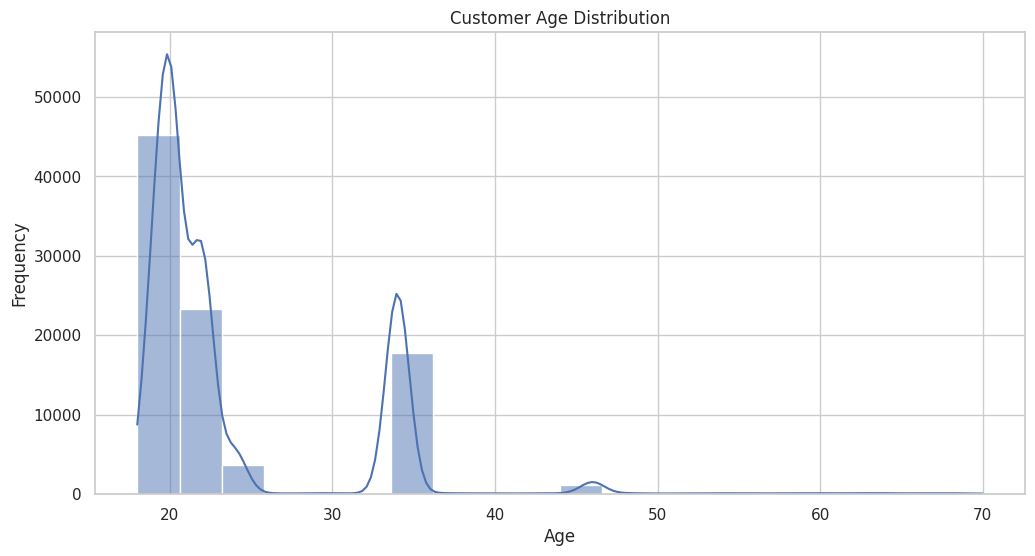

In [21]:
#UNIVARIATE ANALYSIS
#Customer Age distribution
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

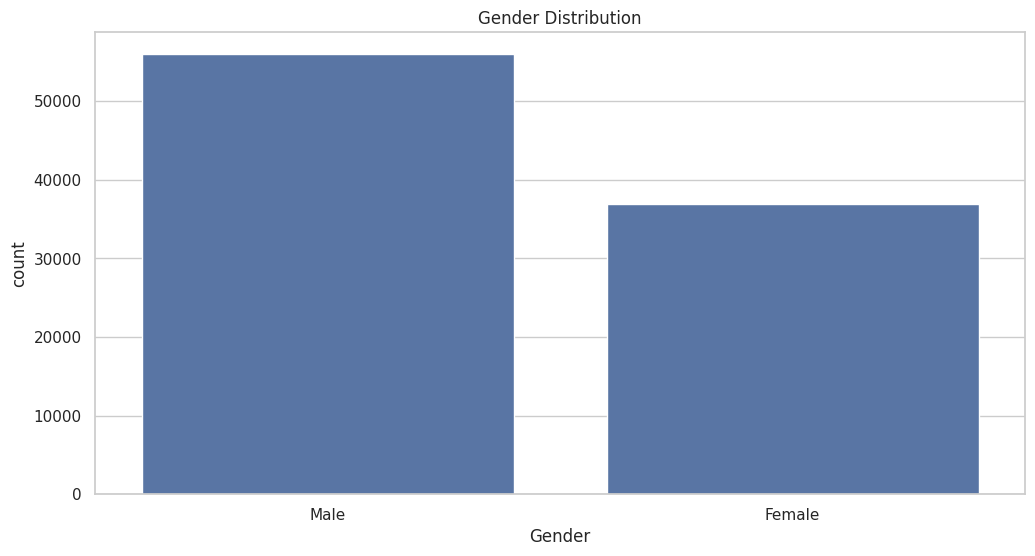

In [23]:
#Gender Distribution
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


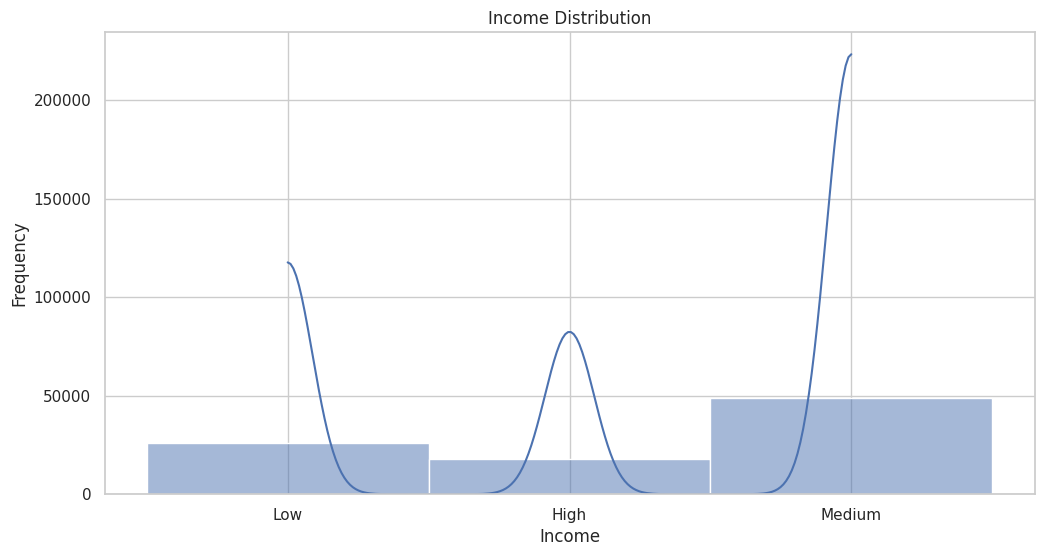

In [25]:
#Income Distribution
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


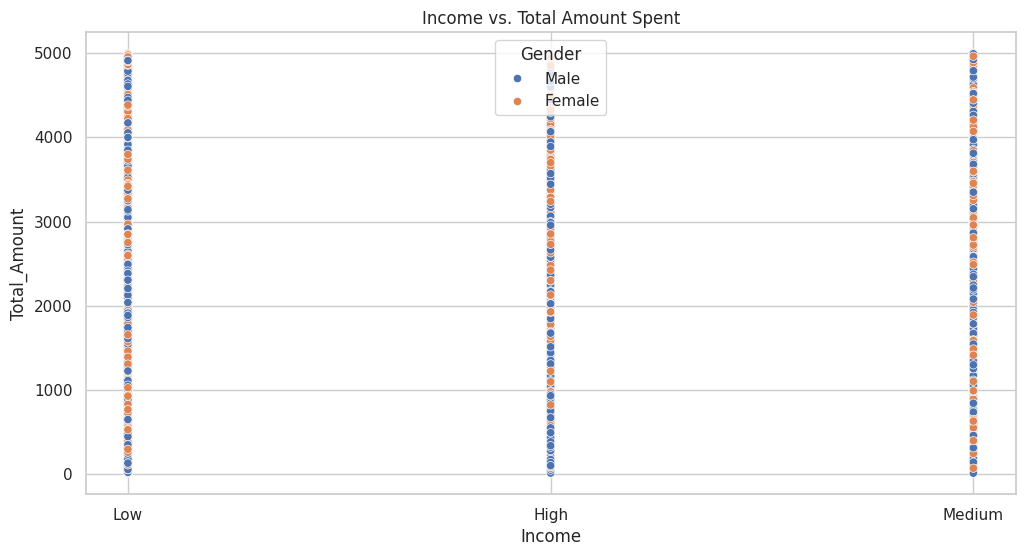

In [29]:
#BIVARIATE ANALYSIS
#Income vs. Total Amount Spent
sns.scatterplot(x='Income', y='Total_Amount', data=df, hue= 'Gender')
plt.title('Income vs. Total Amount Spent')
plt.xlabel('Income')
plt.ylabel('Total_Amount')
plt.show()



Text(0.5, 1.0, 'Average Spending by Gender')

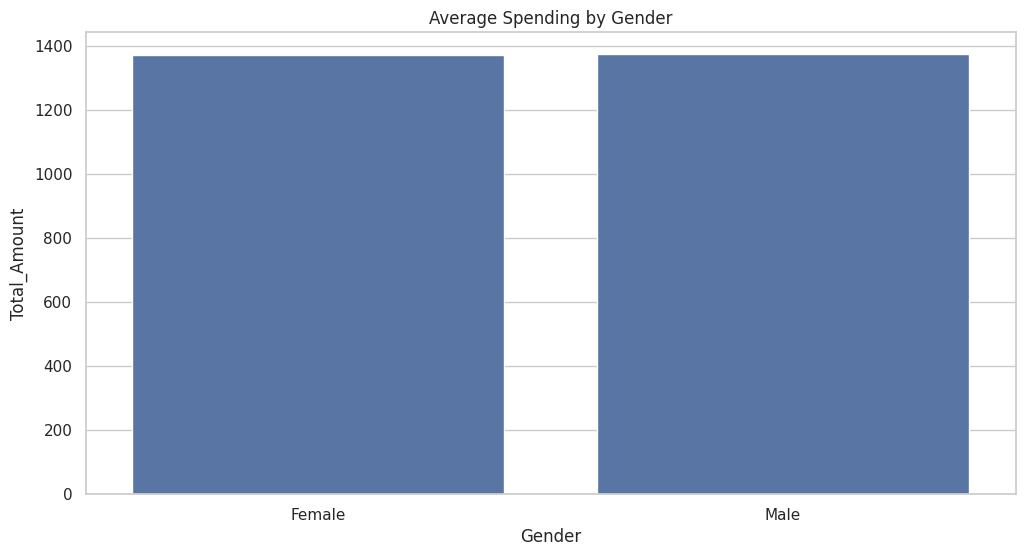

In [31]:
#Average Spending by Gender
avg_spending_by_gender = df.groupby('Gender')['Total_Amount'].mean().reset_index()
sns.barplot(x='Gender', y='Total_Amount', data=avg_spending_by_gender)
plt.title('Average Spending by Gender')

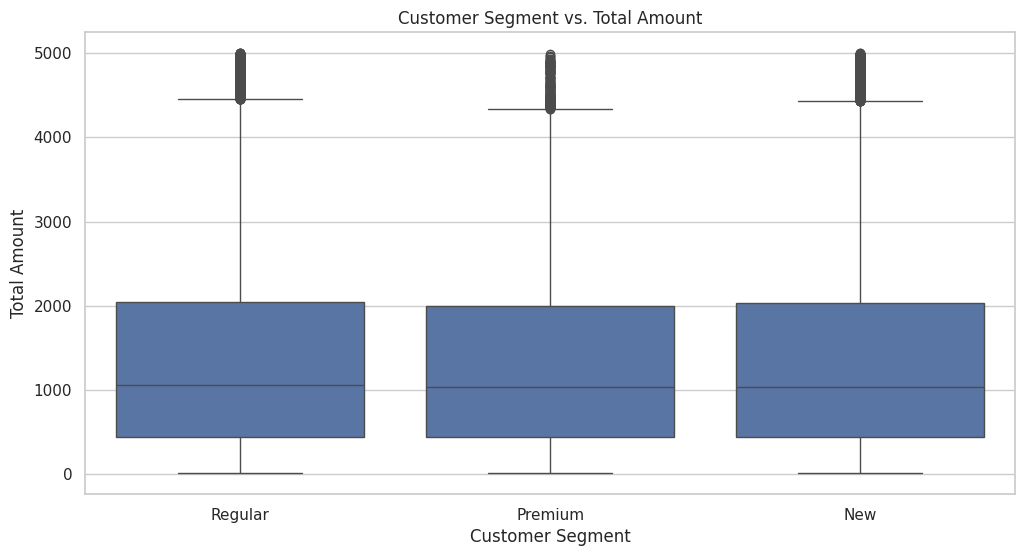

In [32]:
#Customer Segment vs. Total Amount
sns.boxplot(x='Customer_Segment', y='Total_Amount', data=df)
plt.title('Customer Segment vs. Total Amount')
plt.xlabel('Customer Segment')
plt.ylabel('Total Amount')
plt.show()



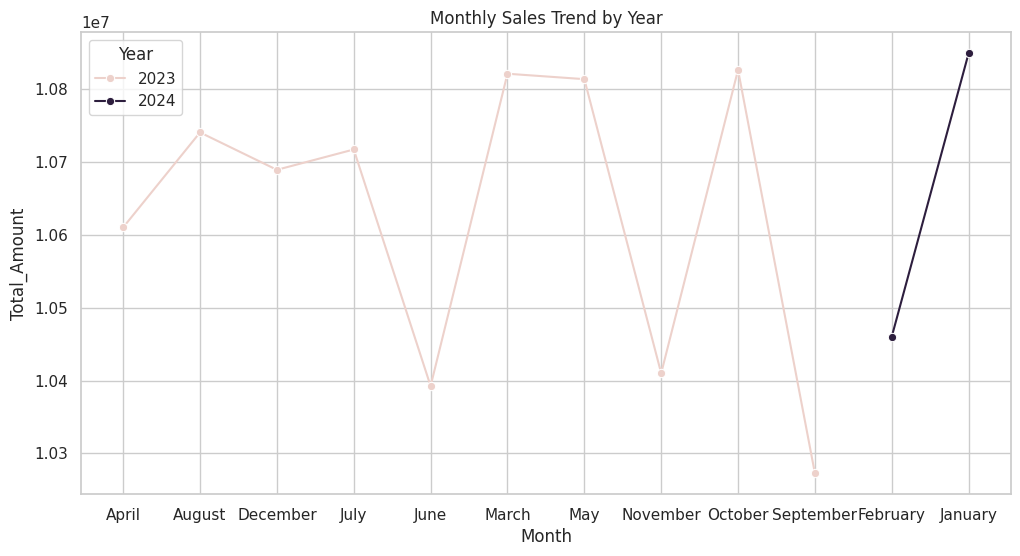

In [33]:
#Time-Based Analysis
#Sales Trend Over Months
monthly_sales = df.groupby(['Year', 'Month'])['Total_Amount'].sum().reset_index()

sns.lineplot(data=monthly_sales, x='Month', y='Total_Amount', hue='Year', marker='o')
plt.title('Monthly Sales Trend by Year')
plt.show()



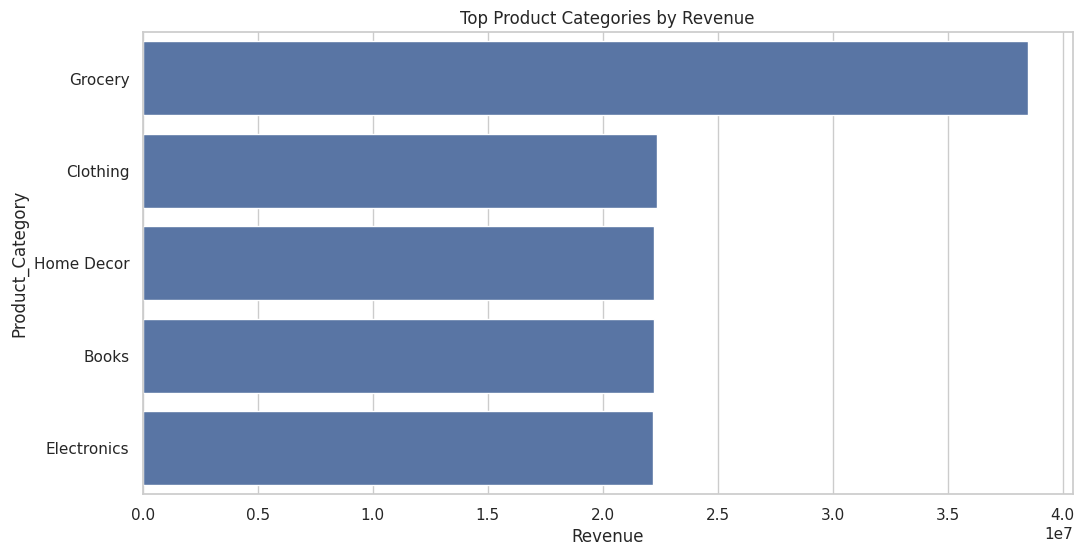

In [39]:
#Top Product Categories by Revenue
top_categories = df.groupby('Product_Category')['Total_Amount'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top Product Categories by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product_Category')
plt.show()


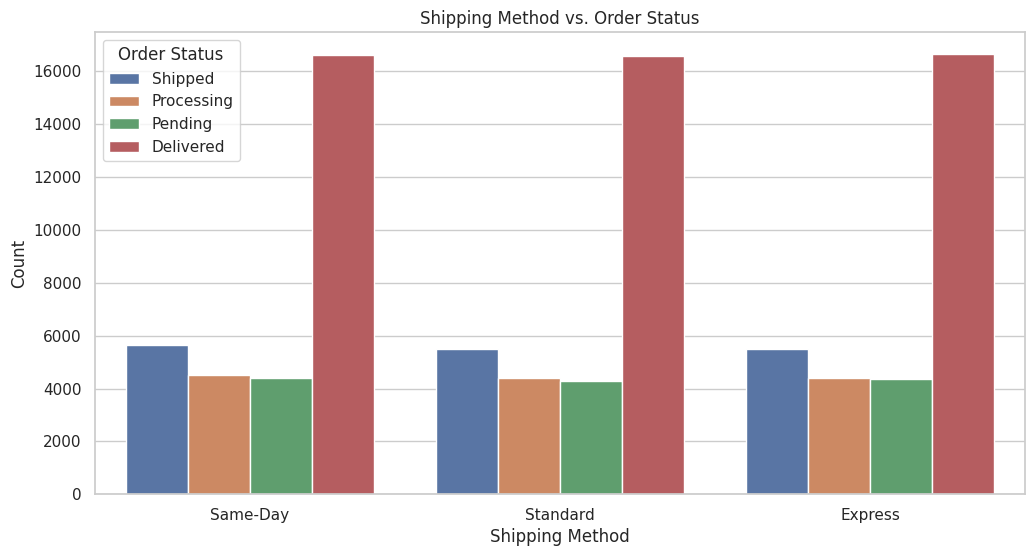

In [40]:
#Shipping Method vs. Order Status
sns.countplot(x='Shipping_Method', hue='Order_Status', data=df)
plt.title('Shipping Method vs. Order Status')
plt.xlabel('Shipping Method')
plt.ylabel('Count')
plt.legend(title='Order Status')
plt.show()


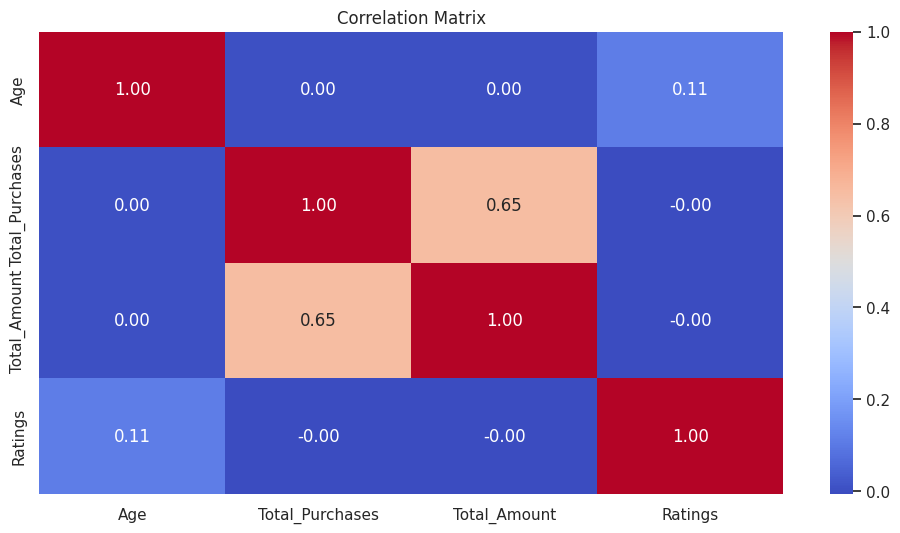

In [44]:
#Correlation Heatmap showing age total purchases total amount and ratings

corr_matrix = df[['Age', 'Total_Purchases', 'Total_Amount', 'Ratings']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
